# Audio III

Bienvenidos al segundo taler de procesamiento de audio a través de python. 


<a href="https://colab.research.google.com/github/institutohumai/talleres/blob/master/Audio_II.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

Temario: 




1.   Introducción
2.   El audio como información.
    1.   El sonido digital. 
    2.   Feature extraction. 
3.   Machine learning
4.   Aplicaciones 
5. Bibliografía






In [ ]:
import pandas as pd 
import numpy as np 
import scipy 
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os 
import random 
from IPython.display import Audio 
import librosa
import librosa.display

In [ ]:
!wget https://zenodo.org/record/3612637/files/FSDKaggle2019.audio_train_curated.zip?download=1
!wget https://zenodo.org/record/3612637/files/FSDKaggle2019.meta.zip?download=1

In [ ]:
!unzip /content/FSDKaggle2019.audio_train_curated.zip?download=1
!unzip /content/FSDKaggle2019.meta.zip?download=1

#Introducción

El aprendizaje automático es un proceso por el cual una computadora puuede comprender la distribución de ciertos datos para recrearlos o predecir su comportamiento. [texto del vínculo](https:// [texto del vínculo](https:// [texto del vínculo](https://)))

Esto presentó un cambio de paradigma: 
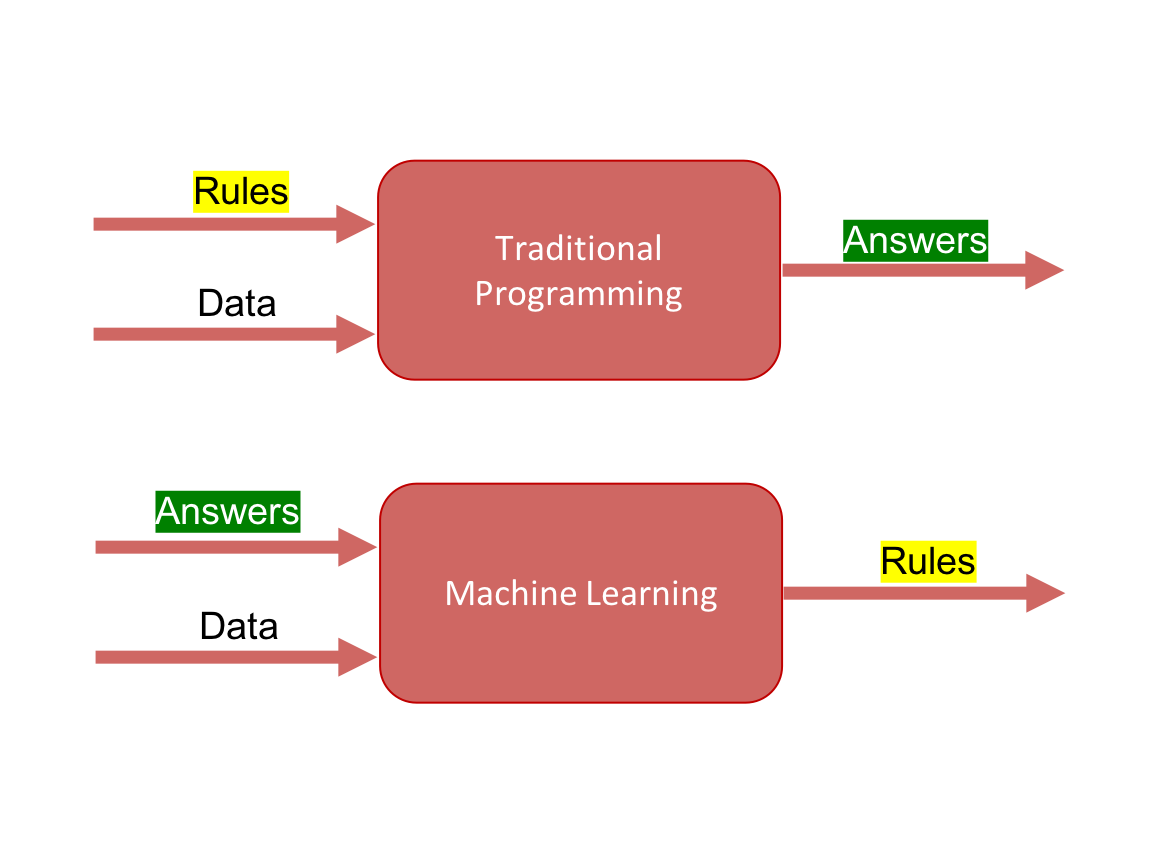

## Tipos de aprendizaje automático 


*   Supervisado
*   No supervisado 

Qué problemas podemos solucionar? 


*   Clasificación
*   Regresión
*   Reconocimiento 









Qué necesitamos entonces? 


*   Poder computacional 
*   Buenos y muchos datos: Dataset



Primer ejemplo regresión lineal 


In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)


plt.show()

## El audio como información

### El sonido digital
Cómo interpreta una computadora el sonido?
- sampling
- cuantización 


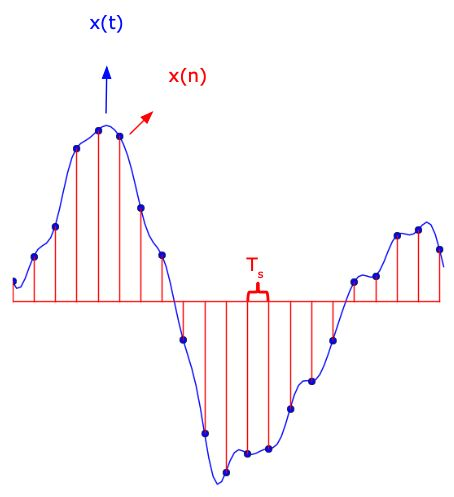

## Feature extraction 

Para poder carácterizar el sonido es necesario estudiar sus propiedades y condensarlas de alguna manera que nos sea útil. Vamos a transformar la información de bajo nivel en un nivel más alto en función a estos parámetros. 

Vamos a definir dos tipos de variables: 


*   Dominio de frecuencias
*   Dominio temporal 


Concepto importante para extracción de datos *Short term windowing*


In [ ]:
randomwav = random.choice(os.listdir("/content/FSDKaggle2019.audio_train_curated"))

In [ ]:
filename = '/content/FSDKaggle2019.audio_train_curated/'+randomwav
x , sr = librosa.load(filename)
print(type(x), type(sr))
librosa.display.waveshow(x,sr)

In [ ]:
Audio(filename)

**Dominio de frecuencias**


Espectrograma

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

Spectral centroid

In [ ]:
cent = librosa.feature.spectral_centroid(y=x, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=x))
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
im = ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='Spectral centroid')

Espectograma Mel

Coeficientes short-term basados en el ceptrum y la escala mel : 

El cepstrum puede ser visto como una información del ritmo de cambio de las diferentes bandas de un espectro. Fue originalmente desarrollado para caracterizar los ecos de las ondas tectónicas, que provenían de terremotos y explosiones. También se utilizaba para analizar las señales captadas por un radar. 

Escala mel: es una escala musical perceptual de tonos juzgados como intervalos equiespaciados por parte de observadores.

In [ ]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=25,
                                   fmax=8000)
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S))
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

**Dominio temporal**

RMS

Promedio de energía 


In [ ]:
S, phase = librosa.magphase(librosa.stft(x))
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=1)
times = librosa.times_like(rms)
ax.semilogy(times, rms[0], label='RMS Energy')
ax.legend()
ax.label_outer()

Zero crossing rate

In [ ]:
librosa.feature.zero_crossing_rate(x)

### Machine Learning

#### Creación de datos: dataset

Es necesario condensar los datos de bajo nivel a mayor nivel para no caer en el problema conocido como *course of dimensionality*

Qué ocurre con audios de distintas longitud?

Tomar estadísticos representativos de los features obtenidos. 

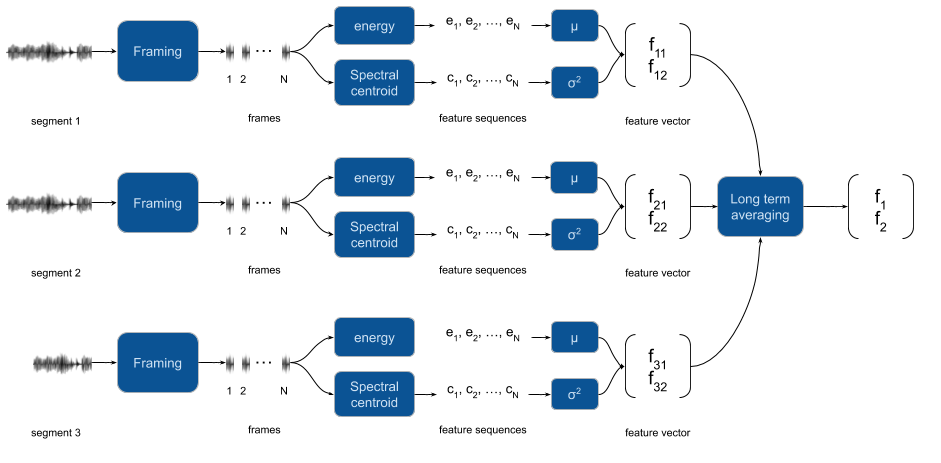

In [ ]:
# creamos los encabezados 
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header = header.split()

In [ ]:
raw_data = {}
for head in header:
    raw_data[head] = []        
for filename in os.listdir('/content/FSDKaggle2019.audio_train_curated')[0:100]:
    y, sr = librosa.load('/content/FSDKaggle2019.audio_train_curated/'+filename, mono=True, duration=5)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    raw_data['filename'].append(filename)
    raw_data['chroma_stft'].append(np.mean(chroma_stft))
    raw_data['rmse'].append(np.mean(rmse))
    raw_data['spectral_centroid'].append(np.mean(spec_cent))
    raw_data['spectral_bandwidth'].append(np.mean(spec_bw))
    raw_data['rolloff'].append(np.mean(rolloff))
    raw_data['zero_crossing_rate'].append(np.mean(zcr))
    for i,e in enumerate(mfcc):
        raw_data['mfcc'+str(i+1)].append(np.mean(e))

In [ ]:
dataset = pd.DataFrame.from_dict(raw_data)

Es necesario escalar los datos para este algorítmo


In [ ]:
standarscaler = StandardScaler()
features_scaled = standarscaler.fit_transform(dataset.drop(columns = ['filename']).values)

In [ ]:
plt.scatter(features_scaled[:,6], features_scaled[:,3])
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Spectral Centroid (scaled)')

Modelado

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42)

In [ ]:
fited = kmeans.fit(features_scaled)

In [ ]:
plt.scatter(features_scaled[:,6], features_scaled[:,3], c=fited.labels_)
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Spectral Centroid (scaled)')

Evaluación y Tuneo de hiperparámetros


In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Viendo algunos resultados 

In [ ]:
labels = pd.read_csv('/content/FSDKaggle2019.meta/train_curated_post_competition.csv')
labels = labels.rename(columns = {'fname':'filename'})

In [ ]:
results = dataset.join(labels[['filename', 'labels']].set_index('filename'), on = 'filename')[['filename', 'labels']]

In [ ]:
results['clusters'] = fited.labels_

## Posibles aplicaciones 

[Detección de anomalías](https://arxiv.org/pdf/2102.07820.pdf#:~:text=Anomalous%20sound%20detection%20(ASD)%20is,anomaly%20can%20prevent%20several%20problems.)

1.   Preservación de bosques
2.   Fallas de maquinaria 

[Speech to text
](https://huggingface.co/transformers/model_doc/speech_to_text.html)

[Speech to face](https://speech2face.github.io/)

# Bibliografía 
[regresión lineal](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

[MIR book, music information retrieval book](https://musicinformationretrieval.com/index.html)

[Introducción al análisis de audio](https://hackernoon.com/intro-to-audio-analysis-recognizing-sounds-using-machine-learning-qy2r3ufl)

 [Dataset](https://zenodo.org/record/3612637)